<a href="https://colab.research.google.com/github/shivashukla02/Retali-Sales-Prediction/blob/main/Shivank_Shukla_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="sky blue"> <h1>**Retail Sales Prediction**</h1></font><hr color="grey">

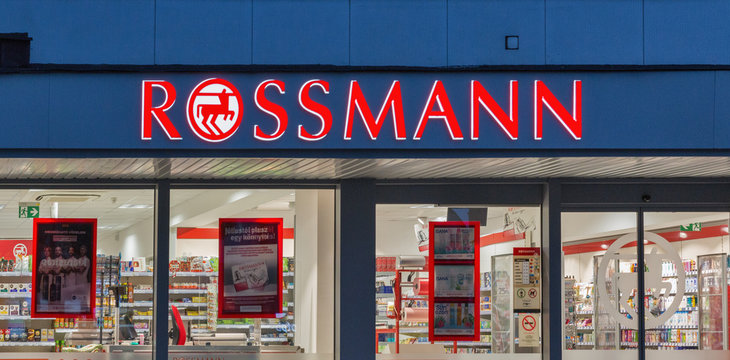

<font color="sky blue"> <h3><b>Business Context</b></h3><hr color="grey"></font>
<font color="sky blue">**Rossmann operates over 3,000 drug stores in 7 European countries**.</font> Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for <font color="sky blue">**1,115 Rossmann stores**.</font> The task is to <font color="sky blue">**forecast the "Sales" column for the test set**</font>. Note that some stores in the dataset were temporarily closed for refurbishment.<hr color="grey">

<font color="sky blue"> <h3><b>Data Description</b></h3><hr color="grey"></font>
We have been provided with 2 data sets.
&emsp;<h4><font color="sky blue">**1) Rosemann store Data**:</font> Information about sales and related factors</h4><br>
&emsp;&emsp;  * <font color="sky blue">**Store**:</font> Unique Store Id<br>
&emsp;&emsp;  * <font color="sky blue">**DayOfWeek**:</font> No. of day of the week<br>
&emsp;&emsp;  * <font color="sky blue">**Date**:</font> current Date of the day<br>
&emsp;&emsp;  * <font color="sky blue">**Sales**:</font> no. of sales of the day<br>
&emsp;&emsp;  * <font color="sky blue">**Customers**:</font> footfall of the day<br>
&emsp;&emsp;  * <font color="sky blue">**Open**:</font> store is open or closed<br>
&emsp;&emsp;  * <font color="sky blue">**Promo**:</font> Store running promotion or not<br>
&emsp;&emsp;  * <font color="sky blue">**StateHoliday**:</font> state holiday or not<br>
&emsp;&emsp;  * <font color="sky blue">**SchoolHoliday**:</font> school holiday or not<br>
&emsp; <h4><font color="sky blue">**2) Store**:</font> Information about the store</h4><br>
&emsp;&emsp; * <font color="sky blue">**Store**:</font> Unique Store Id	<br>
&emsp;&emsp; * <font color="sky blue">**StoreType**:</font>	 4 different type of stores a,b,c,d.<br>
&emsp;&emsp; * <font color="sky blue">**Assortment**:</font> A collection of goods or services that a business provides to a consumer.	
&emsp;&emsp; * <font color="sky blue">**CompetitionDistance**:</font>	distance in meters to the nearest competitor store.<br>
&emsp;&emsp; * <font color="sky blue">**CompetitionOpenSinceMonth**:</font> Month in which the competition store was open. 	<br>
&emsp;&emsp; * <font color="sky blue">**CompetitionOpenSinceYear**:</font> Year in which the competition store was open. 		
&emsp;&emsp; * <font color="sky blue">**Promo2**:</font> Store running consecutive promotion or not 	<br>
&emsp;&emsp; * <font color="sky blue">**Promo2SinceWeek**:</font>	 calendar week when the store started participating in Promo2<br>
&emsp;&emsp; * <font color="sky blue">**Promo2SinceYear**:</font>	year when the store started participating in Promo2<br>
&emsp;&emsp; * <font color="sky blue">**PromoInterval**:</font>The month in which the promotion starts eg: Jan,Apr,Jul,Oct


<hr color="grey">


### <font color = "sky blue"><b>Importing all required libraries and setting Jupyter Notebook</b>

In [38]:
#Importing required libraries
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns, datetime, ast, time, sys, math
import warnings
warnings.filterwarnings('ignore')

#For showing all outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from math import *

#required machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

### <font color = "sky blue">**Loading csv files for Rossmann Stores and Store into a DataFrame**

In [39]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<font color = "sky blue">**1.Collecting Data.**

## **After mounting the google drive we are ready to load our dataset.**

we have two dataset. Which is Rossmann Store data and Store data. In which we have diffrent store observations and its some information like sales store catagories etc.

In [40]:
# Reading the CSV files
df_rossmann = pd.read_csv('/content/drive/MyDrive/retail sales data/Rossmann Stores Data.csv')
df_store = pd.read_csv('/content/drive/MyDrive/retail sales data/store (3).csv')

## <font color = "sky blue">**2.Preparing the Data**

Now looking at the data for the first time and checking the shape of our DataFrames which helps us to get an idea to know the number of rows and columns present in our Rossmann DataFrames.

Using info() method we can easily get the idea of what kind of data type and null values inside our Rossman dataframes we have.

In [41]:
print('------------------------------------Head---------------------------------------\n')
df_rossmann.head()            #checking 1st 5 rows of the df
print('\n------------------------------------Tail---------------------------------------\n')
df_rossmann.tail()            #checking last 5 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_rossmann.shape[0]}, Columns: {df_rossmann.shape[1]}\n')   
print('------------------------------------Info--------------------------------------\n')
df_rossmann.info()            #information about the df
print('\n------------------------------------describe--------------------------------------\n')
df_rossmann.describe()        #statictical description of the df
print('\n------------------------------------NUll_Value_count--------------------------------------\n')
df_rossmann.isnull().sum()    #sum of the null values

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1



------------------------------------Tail---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 9

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

------------------------------------describe--------------------------------------



,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00



------------------------------------NUll_Value_count--------------------------------------



Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<font color="sky blue"><h3>**The data has no null values**</h3>

In [42]:
#As date column is in object format converting it into Date Time format.
df_rossmann['Date'] = pd.DatetimeIndex(df_rossmann['Date'])

In [43]:
#as StateHoliday column is in object lets check its unique values 
df_rossmann['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [44]:
#replacing string '0' with int 0
df_rossmann['StateHoliday'].replace({'0':0}, inplace=True)

In [45]:
#checking the data
df_rossmann.iloc[1113:1118] #Store no. repeats on every new date

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1113,1114,5,2015-07-31,27508,3745,1,1,0,1
1114,1115,5,2015-07-31,8680,538,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
1116,2,4,2015-07-30,5567,601,1,1,0,1
1117,3,4,2015-07-30,8977,823,1,1,0,1


In [46]:
val = (df_rossmann['Store'] == 1).sum() #counting data for no. of days
print(f'Total no. of days in the data set are: {val} days')

Total no. of days in the data set are: 942 days


In [47]:
# Checking if any dates are missing
df_rossmann['Date'].iloc[0] - df_rossmann['Date'].iloc[-1] #last date is not included 

Timedelta('941 days 00:00:00')

<font color = "sky blue"><h4>**No dates are missing in the data**</h4>

In [48]:
#check the no of the days the store remains closed
val = ((df_rossmann['Open'] == 0 ) & (df_rossmann['Store'] == 1)).sum()
print(f'Total no. of days store remain closed: {val} days')

Total no. of days store remain closed: 161 days


In [49]:
#seeing max values of sales and customers.
val_1,val_2 = df_rossmann['Sales'].max(),df_rossmann['Customers'].max()
print(f'Maximum sales recorded: {val_1},\nMaxmimum customers recorded: {val_2}')

Maximum sales recorded: 41551,
Maxmimum customers recorded: 7388


In [50]:
#seeing unique wales for stateholiday and schoolholiday
df_rossmann['StateHoliday'].unique()
print('\n---')
df_rossmann['SchoolHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)


---


array([1, 0])

Check if sales are there even if store is closed for data discrepency.

### <font color = "sky blue">**Checking for outliers** </font>

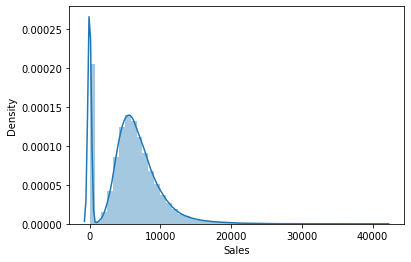

In [51]:
#checking the distribution plot of the sales column.
sns.distplot(df_rossmann['Sales'].astype(np.int64))

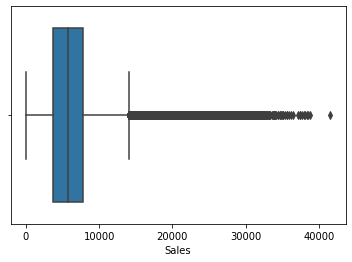

In [52]:
#checking the box plot of the sales column.
sns.boxplot(df_rossmann['Sales'].astype(np.int64))

In [53]:
#statistical values to understand data.
val1 = df_rossmann['Sales'].mean()
val2 = df_rossmann['Sales'].median()
val3 = df_rossmann['Sales'].mode()
print(f'For the sales column:\nMean: {val}\nMedian: {val2}\nMode: {val3}')

For the sales column:
Mean: 161
Median: 5744.0
Mode: 0    0
dtype: int64


<font color = "sky blue"><h3> **Observations:**</h3></font>
* <font color = "sky blue"><h3> **Distribution plot for sales column**:</font>


  1. Sales which shows 0 observation is the part where stores were closed due to holidays or for refurbishment
  2.   Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is right skewed.

* <font color = "sky blue"><h3> **Box plot for sales column**:</font>

  1.   Maximum Data lies between the 100% quertile range of 0 - 14,000
  2.   Outliers are seen after **14,000.**

*   **Outliers will not be removed now as the zero sales looks important for further EDA**.

*   The Mean median and mode will change when the 0 sales figures and outliers will be removed. 
















### <font color = "sky blue">**Checking data for the store**

In [54]:
print('------------------------------------Head---------------------------------------')
df_store.head()               #checking 1st 5 rows of the df
print('------------------------------------Tail---------------------------------------')
df_store.tail()               #checking last 5 rows of the df
print('------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_store.shape[0]}, Columns: {df_store.shape[1]}\n')
print('------------------------------------Info--------------------------------------\n')
df_store.info()               #information about the df
print('------------------------------------describe--------------------------------------\n')
df_store.describe()           #statictical description of the df
print('------------------------------------NUll_Value_count--------------------------------------\n')
df_store.isnull().sum()       #sum of the null values

------------------------------------Head---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


------------------------------------Tail---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


------------------------------------Shape-------------------------------------

Rows: 1115, Columns: 10

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


------------------------------------NUll_Value_count--------------------------------------



Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### <font color = "sky blue">**Null Values Treatment**

In [55]:
#check the persentage of null values in each column.
(df_store.isnull().sum() / len(df_store) ) * 100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

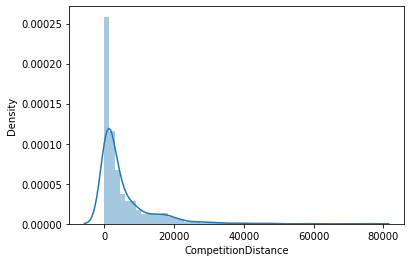

In [56]:
#find distribution the dataset
sns.distplot(df_store['CompetitionDistance'])

<font color = "sky blue"><h3>**Observation:**</h3>

*    Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is <font color = "sky blue">**right skewed**.</font>
*   So, the <font color = "sky blue">**Median values will be used to fill the missing values**.</font>



In [57]:
#check if promo2 is open and week and year are missing
df_store[(df_store['Promo2'] == 1) & (df_store['Promo2SinceYear'].isnull())].count()
print('\n------')
df_store[(df_store['Promo2'] == 1) & (df_store['Promo2SinceWeek'].isnull())].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


------


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### **No missing data found**

In [58]:
# filling competition distance with the median value
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

In [59]:
# checking if competition dicsance is zero due to error in data preparation. 
df_store[(df_store['CompetitionDistance'] == 0.0)].shape[0] / 1115

0.0

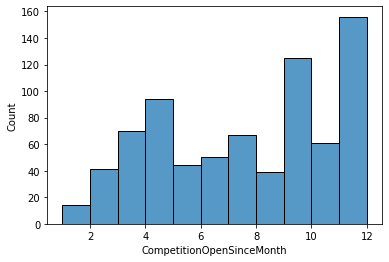

In [60]:
#plot which month has most competition
sns.histplot(df_store['CompetitionOpenSinceMonth'].sort_values())

In [61]:
df_store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])



*   <font color = "sky blue">**CompetitionOpenSinceMonth:**</font> As the dataset contains only 12 values of the month the <font color = "sky blue">**Mode Value will be used to fill the missing values.**</font>
*  <font color = "sky blue">**CompetitionOpenSinceYear:**</font>As the dataset contains values of the year the <font color = "sky blue">**Mode Value will be used to fill the missing values.**







In [62]:
#find mode of the 2 columns
val1,val2 = df_store['CompetitionOpenSinceMonth'].mode()[0],df_store['CompetitionOpenSinceYear'].mode()[0]
print(f'Mode for CompetitionOpenSinceMonth: {val1} \nMode for CompetitionOpenSinceYear: {val2}  ')

Mode for CompetitionOpenSinceMonth: 9.0 
Mode for CompetitionOpenSinceYear: 2013.0  


In [63]:
# filling competition open since month and year with modes of those columns
df_store['CompetitionOpenSinceMonth'].fillna(val1, inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(val2, inplace = True)

When the promo2 is zero the Promo2SinceWeek,Promo2SinceYear, PromoInterval can be seen to be NaN.<br>
<font color = "sky blue">**Therefore, replacing NaN values with 0.**

In [64]:
# inputing the nan values of promo2 related columns with 0
df_store['Promo2SinceWeek'].fillna(value=0,inplace=True)
df_store['Promo2SinceYear'].fillna(value=0,inplace=True)
df_store['PromoInterval'].fillna(value=0,inplace=True)     

In [65]:
#check
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<hr color="grey">

##  <font color = "sky blue">**Mergeing the two DataFrames**

In [66]:
#merging the store data on rossmann using right join on store column
df_rms = pd.merge(df_rossmann,df_store, how='inner', on = 'Store') #rms = rossmann Stores

In [67]:
#check the merged dataframe 
print('------------------------------------Head---------------------------------------\n')
df_rms.head()               #checking 1st 5 rows of the df
print('\n------------------------------------Tail---------------------------------------\n')
df_rms.tail()               #checking last 5 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                            #no. of rows and columns
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n')

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0



------------------------------------Tail---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



In [68]:
#Sorting the df in terms of Date and Store 
df_rms.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])

#reseting the index as sort_values shuffles the rows 
df_rms.reset_index(drop=True, inplace=True)
print('------------------------------------Head---------------------------------------\n')
#cheking if any data is missing after the above operations.
print('------------------------------------Head---------------------------------------\n')
df_rms.head(10)#first 3 rows of the df

print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n') #cheking if any data is missing after the above operations.

------------------------------------Head---------------------------------------

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,0.0,0.0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



Now we have 1017209 numner of rows and 18 columns.


In [69]:
#Sorting the df in terms of Date and Store 
df_rms.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])

#reseting the index as sort_values shuffles the rows 
df_rms.reset_index(drop=True, inplace=True)

#cheking if any data is missing after the above operations.
print('------------------------------------Head---------------------------------------\n')
df_rms.head(10)#first 3 rows of the df

print('\n------------------------------------Shape-------------------------------------\n')

                              #no. of rows and columns
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n')

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,0.0,0.0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



##  <font color = "sky blue"> **Knowing the categorical columns.**
  Checking the count of the following . 
*    <font color = "sky blue">**Assortment**</font>
  *  <font color = "sky blue">**a:**</font> basic
  *  <font color = "sky blue">**b:**</font> extra
  *  <font color = "sky blue">**c:**</font> extended



*   <font color = "sky blue">**StoreType**</font> 
  * <font color = "sky blue">**a:**</font> small store_type.
  * <font color = "sky blue">**b:**</font> medium store_type.
  * <font color = "sky blue">**c**</font> large store_type.
  * <font color = "sky blue">**d:**</font> huge store_type.

*    <font color = "sky blue">**StateHoliday**</font> 
  *  <font color = "sky blue">**a:**</font> public holiday
  *  <font color = "sky blue">**b:**</font> Easter holiday
  *  <font color = "sky blue">**c:**</font> Christmas
  *  <font color = "sky blue">**0:**</font> None



In [70]:
#Getting day from the Date column
df_rms['DayOfYear'] = df_rms['Date'].dt.dayofyear
#Getting week from the Date column
df_rms['WeekOfYear'] = df_rms['Date'].dt.weekofyear
#Getting month from the Date column
df_rms['Month'] = df_rms['Date'].dt.month
#Getting year from the Date column
df_rms['Year'] = df_rms['Date'].dt.year


<font color = "sky blue">**As per domain knowledge:**

*   Categorical columns like <font color = "#20B2AA">**Assortment**</font> and <font color = "#20B2AA">**StoreType**</font> will be replaced by dummy variables after EDA.

*   <font color = "#20B2AA">**StateHoliday**</font> will be converted into 0 and 1 taking 1 as all the variables with holiday.



In [71]:
##converting catagorical value into interger values based on StateHoliday class. 
df_rms["StateHoliday"] = df_rms["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [72]:
df_rms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

As we can see that many columns are in object datatype so we have to check the datatype of these column because our machine learning algorithms only takes numberical values.

In [73]:
#converting object dtype to integer.
df_rms['StateHoliday']= df_rms['StateHoliday'].astype(int)

##<font color = "sky blue">**Exploratry Data Analysis**


*   Exploratory data analysis (EDA) is a process of analyzing and summarizing a dataset in order to better understand its properties and characteristics.
*   It is an iterative process that involves visualizing and summarizing the data, identifying patterns and relationships, and testing hypotheses about the data.
*   It helps researchers to gain insights into the data, identify potential issues or problems, and formulate hypotheses that can be tested through further analysis.
*   EDA is typically done using statistical and visualization techniques, such as histograms, scatter plots, and box plots, and often involves the use of software tools such as R or Python.



##<font color = "sky blue">**Hypothesis Testing**


*   Sales should be highest on saturday or sundays due to weekends.
*   sales should have a positive effect after promo.
*   Store store B should have lest sales as it have lest no. of stores.
*   The month of december should have highest no. of sales as it has most no. of public holidays.
*   If the compition distance is close to each other than it should increase the overall sales.




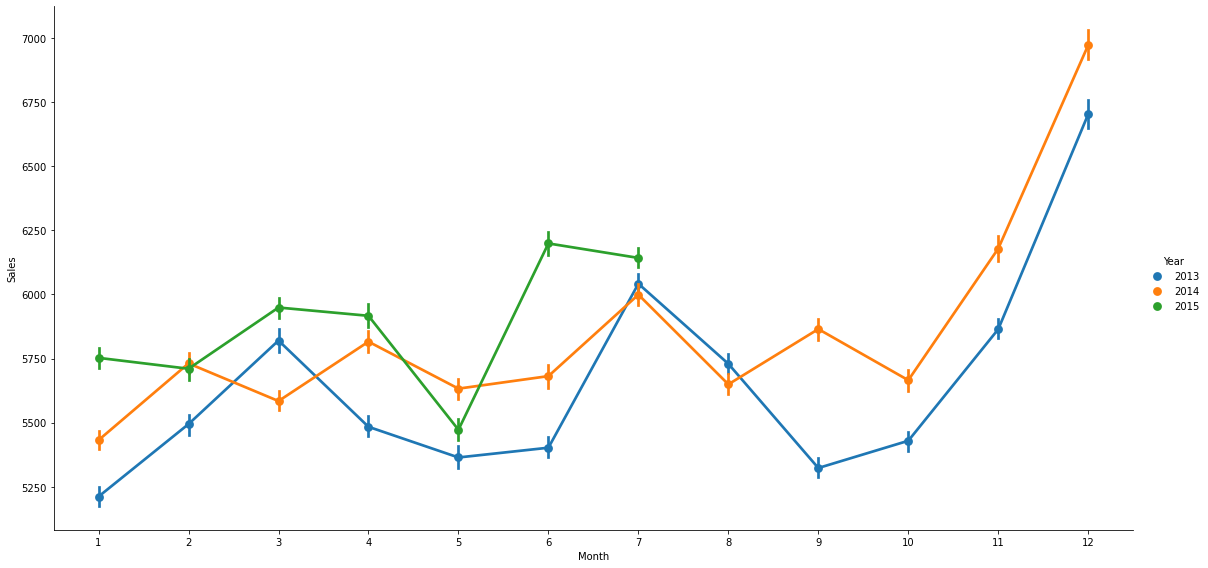

In [74]:
#monthly sales of every year
sns.catplot( data=df_rms,x="Month", y="Sales", hue="Year", style="Year",kind="point",size=8,aspect=2)

###<font color = "Sky blue">**Obesrvation**:


*   Here the  trend shows that the sales increase significantly in the month of October to December due to the holiday season.
*   From the chart we can see that there Are roughly 3 cycle of sales.



[Text(0.5, 1.0, 'Sales according to year ')]

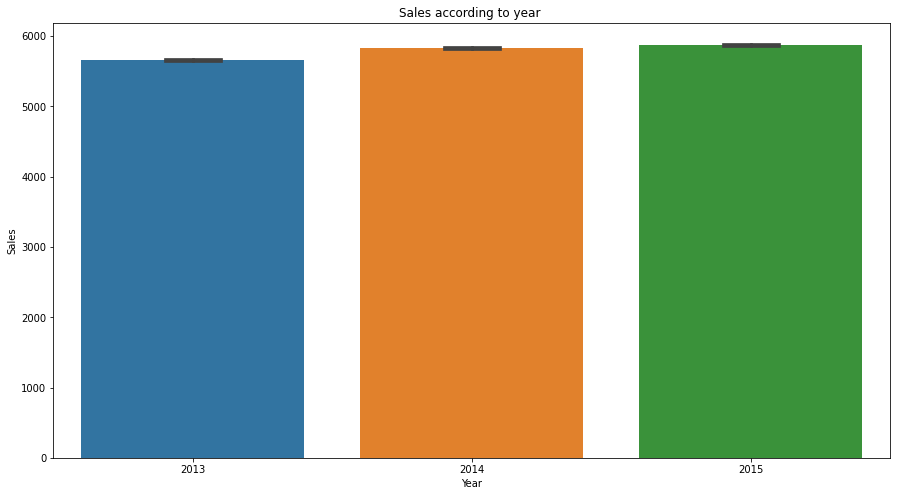

In [75]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df_rms,x='Year',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to year ')
plt.show()


### <font color = "sky blue">**Observation:**

*   From above chart we can see that there is YoY increase in sales from 2013-2015

* Despite having data available for  7 months in year 2015.It has already crossed the sales of 2014.   





### <font color = "sky blue">Week day sales

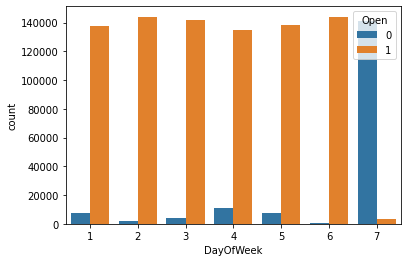

In [76]:
sns.countplot(x='DayOfWeek',hue='Open',data= df_rms)

### <font color = "sky blue">**Observation:**


*   This plot shows open and close of the shop on days of the week.
*   Here, the store in open for maximum no. of days on Saturday and minimum no. of days Sunday. 



[Text(0.5, 1.0, 'Sales according to Day of week ')]

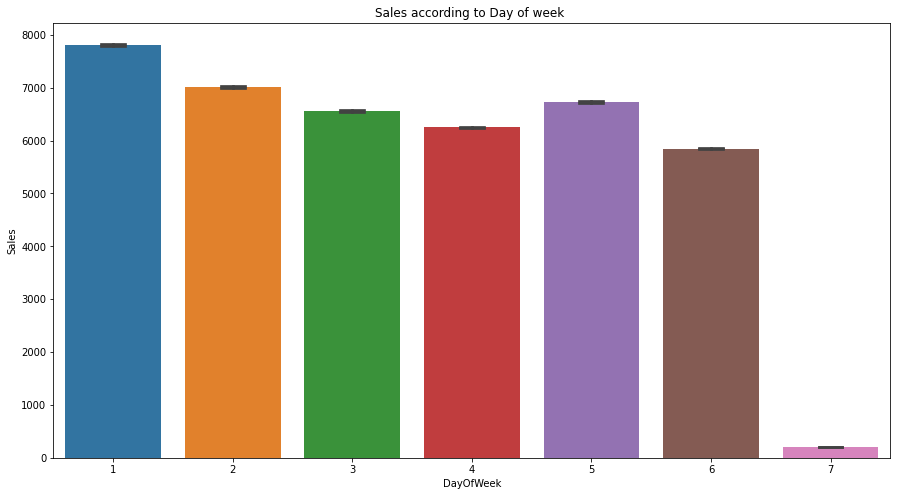

In [77]:

#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df_rms,x='DayOfWeek',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Day of week ')
plt.show()

### <font color = "sky blue">**Observation:**


*   As sundays has the most store closed so it has the least number of sales
*   On the other hand mondays have the maximum number of sales
*   Despite having the maximum number of stores open still have  third least sales numbers.








###<font color = "sky blue">**Impact of Promo on sales**

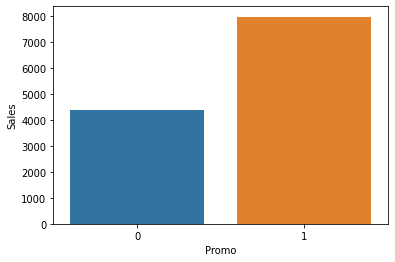

In [78]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(df_rms.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

### <font color = "sky blue">**Observation:**

*   The Sales get almost increases by 100 % when promo takes place
*   As we can see that the store who participating in promotion having more sales as compare to other. which means promotion is the key to attract the customer towards the store.





([<matplotlib.patches.Wedge at 0x7fedac36bd00>,
 [Text(1.0159180704524655, -0.6386786939675845, 'Not-Affected'),
  Text(-0.9312582038409442, 0.5854555130656288, 'Affected')],
 [Text(0.5926188744306049, -0.37256257148109095, '82.1%'),
  Text(-0.5079590202768786, 0.31933937076307023, '17.9%')])

(-1.1045085311776077,
 1.1946791547298579,
 -1.1573233397609766,
 1.0528563411165743)

Text(0.5, 1.0, 'Sales Affected by Schoolholiday or Not ?')

[]

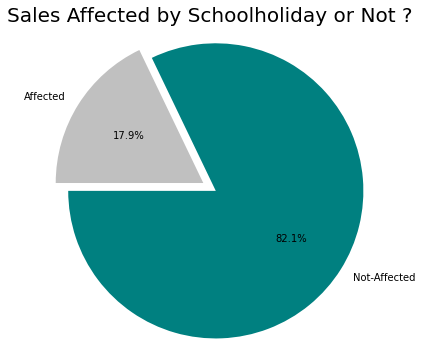

In [79]:
#check the amount of sales affected by school holidays.

labels = 'Not-Affected' , 'Affected' #make labels of affected and not affected
sizes = df_rms['SchoolHoliday'].value_counts() #get value caunt of schoolh holidays
colors = ['Teal', 'silver'] #set the colors of the chart
explode = (0.1, 0.0) #set explode values

#make a pie chart of the persentage of affected and non affected values. 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

### <font color = "sky blue">**Observation:**




*   Only 18% Sales are affected during school holiday






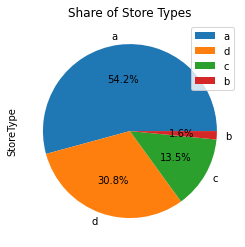

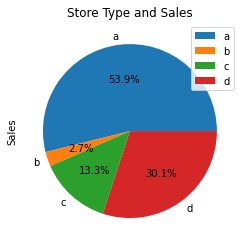

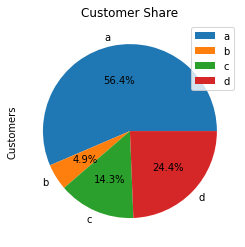

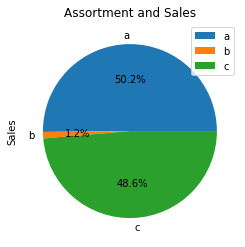

In [80]:
#store types in all of the dataset
plt1 = df_rms["StoreType"].value_counts()
plt1.plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%')
plt.show()

#store type and sales
plt2 = df_rms.groupby("StoreType")["Sales"].sum()
plt2.plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%')
plt.show()

#customers and store type
plt3 = df_rms.groupby("StoreType")["Customers"].sum()
plt3.plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%')
plt.show()

#Assortment and Sales
plt4 = df_rms.groupby("Assortment")["Sales"].sum()
plt4.plot.pie(title='Assortment and Sales', legend=True, autopct='%1.1f%%')
plt.show()

# plt5 = df_rms.groupby("StoreType")["Assortment"].count()
# plt5.plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%')
# plt.show()


### <font color = "sky blue">**Observation:**

*  But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
*  Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier. 
*   Maximum sales are from store a i.e. <font color = "sky blue">**54%**</font>
*   Minimum sales are from store d i.e. <font color = "sky blue">**1.5%**</font>



Text(-0.25, 70878.0, '\n70878.0')

Text(0.75, 346389.0, '\n346389.0')

Text(1.75, 113584.0, '\n113584.0')

Text(2.75, 6594.0, '\n6594.0')

Text(0.016666666666666663, 65962.0, '\n65962.0')

Text(1.0166666666666666, 205238.0, '\n205238.0')

Text(2.0166666666666666, 199328.0, '\n199328.0')

Text(3.0166666666666666, 942.0, '\n942.0')

Text(0.2833333333333333, nan, '\nnan')

Text(1.2833333333333332, nan, '\nnan')

Text(2.283333333333333, nan, '\nnan')

Text(3.283333333333333, 8294.0, '\n8294.0')

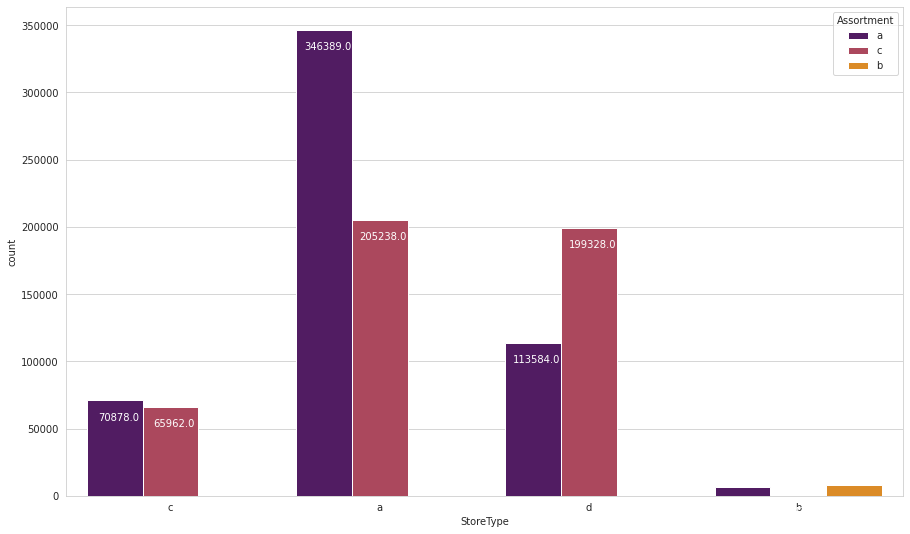

In [81]:

#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=df_rms,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

Despite being scarce, store type B had the greatest average sales. The three types of assortments, especially level B, which is exclusively sold at type B stores, and the fact that the stores are open on Sundays are among the reasons.

##<font color = "sky blue"> **Now check the distribution of our each features**

In [82]:
numeric_features = list(df_rms.describe().columns)


<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Scatter plot b/w "Customers" and "Sales"')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Sales')

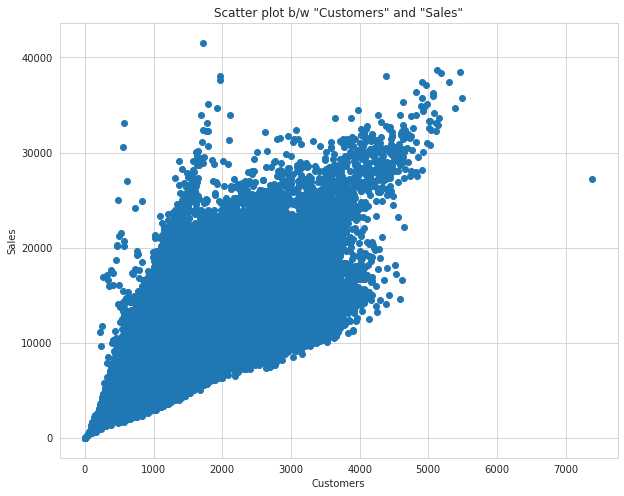

In [83]:
#comparission between Customers and Sales
plt.figure(figsize = (10,8))
x = df_rms['Customers']
y = df_rms['Sales']
plt.scatter(x,y)
plt.title('Scatter plot b/w "Customers" and "Sales"')
#set x and y label
plt.xlabel('Customers')
plt.ylabel('Sales')


### <font color = "sky blue">**Observation:**

*   Positive relation between no. of Customers and Sales.
*   Linear regression with high varience & few outliers.



<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Scatter plot b/w "CompetitionDistance" and "Sales"')

Text(0.5, 0, 'CompetitionDistance')

Text(0, 0.5, 'Sales')

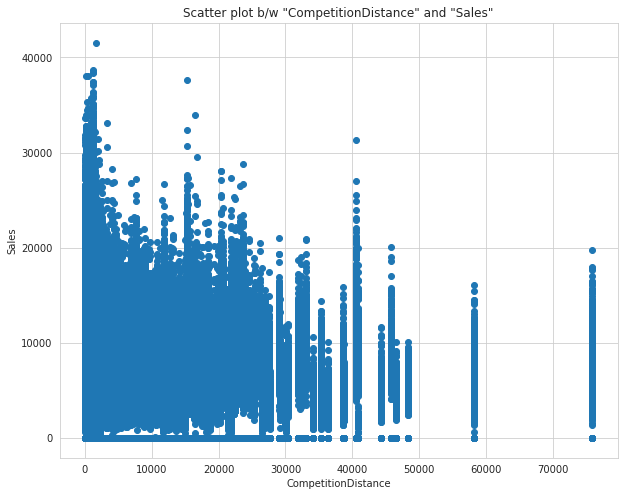

In [84]:
#comparison between Competition Distance and Sales

plt.figure(figsize = (10,8))
x = df_rms['CompetitionDistance']
y = df_rms['Sales']
plt.scatter(x,y)
plt.title('Scatter plot b/w "CompetitionDistance" and "Sales"')
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')

### <font color = "sky blue">**Observation:**


*   As the distance between the competition increases the sales decreases.
*   After certain distance (30,000) correlation between CompetitionDistance and Sales is very vague.

In [85]:
df_rms[df_rms['CompetitionOpenSinceYear'] == 1900].shape[0]
print('---')
df_rms[df_rms['CompetitionOpenSinceYear'] == 1960].shape[0]

758

---


0

<Figure size 1152x648 with 0 Axes>

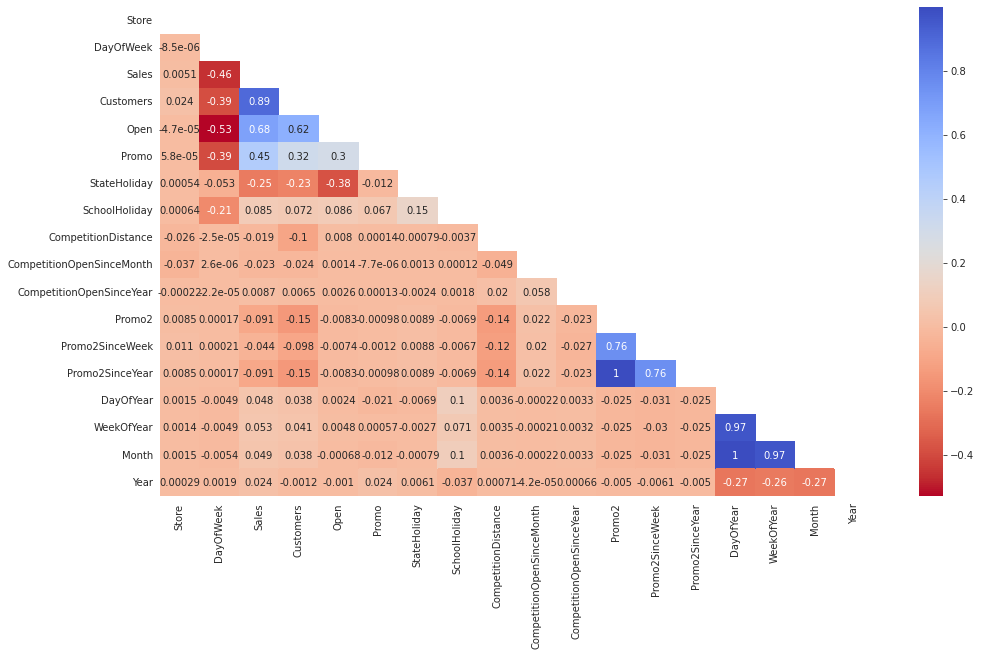

In [86]:
#set fig size
plt.figure(figsize=(16,9))
#Return copy of array with upper part of the triangle
mask = np.triu(np.ones_like(df_rms.corr()))
#plot a heatmapof the whole dataframe to check corelation
sns.heatmap(df_rms.corr(),annot= True, cmap='coolwarm_r', mask = mask)


### <font color="sky blue">**Possitive Correlation**</font>
Customers and sales has the most positive correlation of **0.84**<br>
Followed by open and Sales with correlation of **0.68**
### <font color="sky blue">**Negative Correlation**</font>
Open and Days of week has most negative correlation of **-0.53**

In [87]:
#checking the dataframe head and info to make pair plot
df_rms.head()
df_rms.info()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfYear,WeekOfYear,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,212,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",212,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",212,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,212,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,212,31,7,2015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [88]:
# Select all object columns
object_columns = df_rms.select_dtypes(['object'])

# Drop the object columns from the DataFrame
df_s = df_rms.drop(object_columns, axis=1)


In [89]:
df_s.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfYear,WeekOfYear,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,2008.0,0,0.0,0.0,212,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,570.0,11.0,2007.0,1,13.0,2010.0,212,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,14130.0,12.0,2006.0,1,14.0,2011.0,212,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,620.0,9.0,2009.0,0,0.0,0.0,212,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,29910.0,4.0,2015.0,0,0.0,0.0,212,31,7,2015


As the code takes time to execute we have put the photo of the plot with the code given below

In [90]:
# #code block requires huge amount of time to execute therefore pasted the output of the block and commented the code.
# #pairplot for store dataset
# sns.set_style("whitegrid", {'axes.grid' : False}) #set style of the plot

# #plot the pair plot of all the required columns in the dataframe
# pp=sns.pairplot(df_s[['Sales','Customers','Year','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].sample(10000),hue='Sales')
# pp.fig.set_size_inches(15,15)

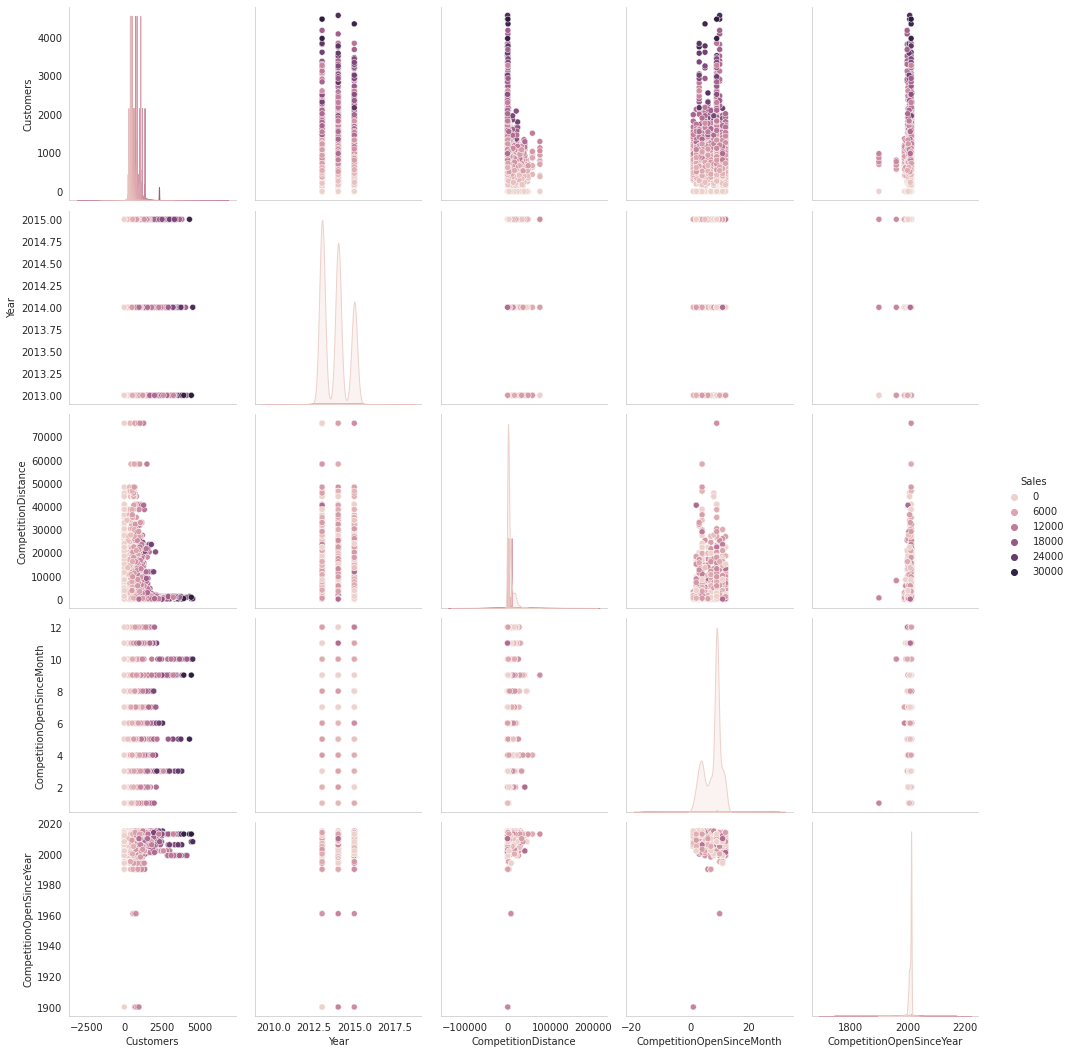

In [91]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(df_s[['Sales','Customers','Year','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].sample(10000),hue='Sales')
pp.fig.set_size_inches(15,15)

Create a dummy variable -pd.getdummies
<br>
train and test split<br>
ml model on train data sets<br>
basic model on prediction of sales with every column<br>
Multicollinearity Test<br>

### <font color = "sky blue"><b>Creating Dummy variables</b>

In [92]:
#Create a new dataframe with dummy variables of the object columns.
df_dummy = pd.get_dummies(data = df_rms, columns = ['DayOfWeek','StoreType',	'Assortment'], drop_first = True)

In [93]:
print('------------------------------------Head---------------------------------------\n')
df_dummy.head() #get head of the dataframe

print('\n------------------------------------Info---------------------------------------\n')
df_dummy.info() #get info of the dataframe

print('\n------------------------------------Shape---------------------------------------\n')
#get shape of the dataframe
print(f'Rows: {df_dummy.shape[0]}, Columns: {df_dummy.shape[1]}')

------------------------------------Head---------------------------------------



,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,0,1,0,0,0,1,0,0,0
1,2,2015-07-31,6064,625,1,1,0,1,570.0,11.0,...,0,0,1,0,0,0,0,0,0,0
2,3,2015-07-31,8314,821,1,1,0,1,14130.0,12.0,...,0,0,1,0,0,0,0,0,0,0
3,4,2015-07-31,13995,1498,1,1,0,1,620.0,9.0,...,0,0,1,0,0,0,1,0,0,1
4,5,2015-07-31,4822,559,1,1,0,1,29910.0,4.0,...,0,0,1,0,0,0,0,0,0,0



------------------------------------Info---------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   Date                       1017209 non-null  datetime64[ns]
 2   Sales                      1017209 non-null  int64         
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  int64         
 7   SchoolHoliday              1017209 non-null  int64         
 8   CompetitionDistance        1017209 non-null  float64       
 9   CompetitionOpenSinceMonth  1017209 non-null  float64       
 10  CompetitionOpenSince

Remove features with high percentages of missing values

In [94]:
# drop all the columns which are not required.
df_dummy.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','Date','PromoInterval'], axis = 1, inplace = True)

In [95]:
# check the dataframe after droping few columns
df_dummy.head() 

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,DayOfYear,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5263,555,1,1,0,1,1270.0,0,212,...,0,0,1,0,0,0,1,0,0,0
1,2,6064,625,1,1,0,1,570.0,1,212,...,0,0,1,0,0,0,0,0,0,0
2,3,8314,821,1,1,0,1,14130.0,1,212,...,0,0,1,0,0,0,0,0,0,0
3,4,13995,1498,1,1,0,1,620.0,0,212,...,0,0,1,0,0,0,1,0,0,1
4,5,4822,559,1,1,0,1,29910.0,0,212,...,0,0,1,0,0,0,0,0,0,0


# <font color = "sky blue">**Feature Selection.**

As we have observed, our dataset in which we have feature name called 'Open' which simply tells us weather a store open or closs. so sales only generated when store is open. So we have to eleminate those rows/ observation in which store is closs or its value = 0. then we have only data of store which is open. so we also drop that columns because all the observation values are same as '1'.

## <font color = "sky blue">**Check Multicolinerity**

In [96]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns 
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending = False)

    return(vif)

In [97]:
#check multicolinerity of all the remaining variables
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
8,Month,564.101464
6,DayOfYear,514.428005
7,WeekOfYear,61.181227
9,Year,24.985713
0,Customers,6.418616
15,DayOfWeek_7,3.115522
16,StoreType_b,2.385302
14,DayOfWeek_6,2.330946
1,Promo,2.283923
5,Promo2,2.152976


<font color = "sky blue">**Month: 564.1014**

Drop month column as it has highest value and check multicolinearity again

In [98]:
#drop the varible
df_dummy.drop('Month', axis = 1, inplace = True)

In [99]:
#check multicolinerity of all the remaining variables
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
7,WeekOfYear,60.625836
6,DayOfYear,58.966210
8,Year,22.037074
0,Customers,6.416594
14,DayOfWeek_7,3.109048
15,StoreType_b,2.385233
13,DayOfWeek_6,2.327622
1,Promo,2.251992
5,Promo2,2.152973
18,Assortment_b,2.106965


<font color = "sky blue">**WeekOfYear:	60.6258**

Drop month column as it has highest value and check multicolinearity again

In [100]:
#drop the varible
df_dummy.drop('WeekOfYear', axis = 1, inplace = True)

In [101]:
#check multicolinerity of all the remaining variables
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
7,Year,21.957509
0,Customers,6.416387
6,DayOfYear,3.606502
13,DayOfWeek_7,3.109021
14,StoreType_b,2.385227
12,DayOfWeek_6,2.327382
1,Promo,2.237995
5,Promo2,2.152973
17,Assortment_b,2.106965
18,Assortment_c,2.046535


<font color = "sky blue">**Year:	21.9575**

Drop month column as it has highest value and check multicolinearity again

In [102]:
#drop the varible
df_dummy.drop('Year', axis = 1, inplace = True)

In [103]:
#check multicolinerity of all the remaining variables
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
0,Customers,4.309367
6,DayOfYear,3.254634
13,StoreType_b,2.348660
1,Promo,2.162611
16,Assortment_b,2.105486
17,Assortment_c,2.030084
5,Promo2,1.909813
15,StoreType_d,1.679569
11,DayOfWeek_6,1.654362
10,DayOfWeek_5,1.631738


###<font color = "sky blue">**Now we have VIF values of all variablea under 5. Thus, these are the required variables.**

### <font color = "sky blue"><b>Splitting the Data into Training and Testing Sets</b>

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

for now splitting data randomly and do the ml if output not proper than we will split it in time duration.

In [104]:
# split the dummy dataset into train and test dataframe
df_train, df_test = train_test_split(df_dummy, train_size = 0.8, random_state = 100)

In [105]:
#check the shape of the train and test models.
df_train.shape, df_test.shape

((813767, 21), (203442, 21))

traning data without rescalling

In [106]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]

print(f'The shape of X_train is: {X_train.shape}\n')
print(f'The shape of y_train is: {y_train.shape}\n')
print(f'The shape of X_test is: {X_test.shape}\n')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (813767, 20)

The shape of y_train is: (813767, 1)

The shape of X_test is: (203442, 20)

The shape of y_test is: (203442, 1)


In [107]:
X_train.head()

,Store,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,DayOfYear,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
159073,744,709,1,0,0,0,1370.0,1,70,0,1,0,0,0,0,0,0,0,0,0
942545,41,353,1,1,0,0,1180.0,1,67,0,0,0,1,0,0,0,0,1,0,1
399384,376,879,1,0,0,1,160.0,0,191,0,0,1,0,0,0,0,0,0,0,0
513043,929,547,1,0,0,0,4820.0,0,88,0,0,0,0,1,0,0,0,0,0,1
30918,814,502,1,0,0,0,24530.0,0,185,0,0,0,0,1,0,0,0,1,0,1


In [108]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now Lets implement 3 models on our dataset:-
1. Linear Regression.
  * Lasso
  * Ridge
  * Elastic Net
2. Decision Tree
3. Random Forrest
  * Random Forrest with Optimization
4. XGBoost
  * XGBoost with Optimization.

## We will be using following Matrics to check our model performance :
 1. Mean Absolute Error (MAE)
 2. Mean Squared Error (MSE)
 3. Root Mean Square Error (RMSE)
 4. Mean Square Error (MSE)
 5. R Squared (R2)
 6. Adjusted R Squared

Making a function to calculate and print all the parameters to compare the performance of different Machine Learning Models.

In [123]:
def values_cal(name,y_t, y_te): 
  l1 = list()
  
  #calculate MSE
  #train
  MSE_t= mean_squared_error(y_train, y_t)
  print("Train MSE:",MSE_t)
  l1.append(MSE_t)

  #test
  MSE_te= mean_squared_error(y_test, y_te)
  print("Test MSE:",MSE_te)
  l1.append(MSE_te)

  #calculate RMSE
  #Train
  RMSE_t=np.sqrt(MSE_t)
  print("\nTrain RMSE:",RMSE_t)
  l1.append(RMSE_t)
        
  #test
  RMSE_te=np.sqrt(MSE_te)
  print("Test RMSE:",RMSE_te)
  l1.append(RMSE_te)

  #calculate MAE
  #train
  MAE_t= mean_absolute_percentage_error(y_train, y_t)
  print("\nTrain MAPE:",MAE_t)
  l1.append(MAE_t)

  #test
  MAE_te= mean_absolute_percentage_error(y_test, y_te)
  print("Test MAPE:",MAE_te)
  l1.append(MAE_te)

  #calculate r2 and adjusted r2
  #train
  r2_t= r2_score(y_train, y_t)
  print("\nTrain R2:",r2_t)
  l1.append(r2_t)

  #test
  r2_te= r2_score(y_test, y_te)
  print(f"Test R2:",r2_t)
  l1.append(r2_te)

  rows = X_test.shape[0]
  cols = X_test.shape[1]
  #train
  Adjusted_R2_t = (1 - (1 - r2_t * ((rows - 1) / (rows - cols - 1))))
  print(f"\nTrain Adjusted R2:",Adjusted_R2_t)
  l1.append(Adjusted_R2_t)
  
  #test
  Adjusted_R2_te = (1 - (1 - r2_te * ((rows - 1) / (rows - cols - 1))))
  print(f"Test Adjusted R2: {Adjusted_R2_te}\n")
  l1.append(Adjusted_R2_te)

  #Plot the figure
  plt.figure(figsize=(15,10))
  plt.scatter(y_test,np.array(y_te), color = "Teal")
  # plt.plot(y_test,(np.array(y_test)))
  plt.legend(["Predicted","Actual"])
  plt.show()

  rounded_values = [round(value, 4) for value in l1]
  return rounded_values

## <font color = "sky blue">**1. Linear Regression**

In [124]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [125]:
# Make a function to get summary of the model
def linear_model(X):
    X_train_lm = sm.add_constant(X)
    lr = sm.OLS(y_train, X_train_lm)
    lr_model = lr.fit()
    print(lr_model.summary())

In [126]:
# check the required parameters
linear_model(X_train)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 3.776e+05
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:20:32   Log-Likelihood:            -6.9255e+06
No. Observations:              813767   AIC:                         1.385e+07
Df Residuals:                  813746   BIC:                         1.385e+07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -483.7321     17.945    -26.956      0.0

In [127]:
# change np array into dataframe
X_train = pd.DataFrame(X_train)

In [128]:
#get the X_train and X-test value
y_pred_train_LR = regressor.predict(X_train)
y_pred_test_LR = regressor.predict(X_test)

In [129]:
print(regressor.coef_)  # Output: [1.]
print(regressor.intercept_)  # Output: 0.0

[[  -95.96463974 53431.84353381  1185.55333445  1245.88162745
   -205.89449114   111.34248735  1563.01961928   233.13062616
    251.64847676  -471.27141845  -617.39842556  -676.14491847
   -574.29739692  -200.11813361  -198.18172392 -3122.85330538
   -113.46240091   913.48881897 -4121.09970334   262.08364824]]
[-483.73206326]


Train MSE: 1444076.9594518945
Test MSE: 1460445.7451025206

Train RMSE: 1201.6975324314744
Test RMSE: 1208.4890339190176

Train MAPE: 3.965356421594898e+17
Test MAPE: 3.9479548310661504e+17

Train R2: 0.9027186149445506
Test R2: 0.9027186149445506

Train Adjusted R2: 0.9028073686735112
Test Adjusted R2: 0.9009558372058463



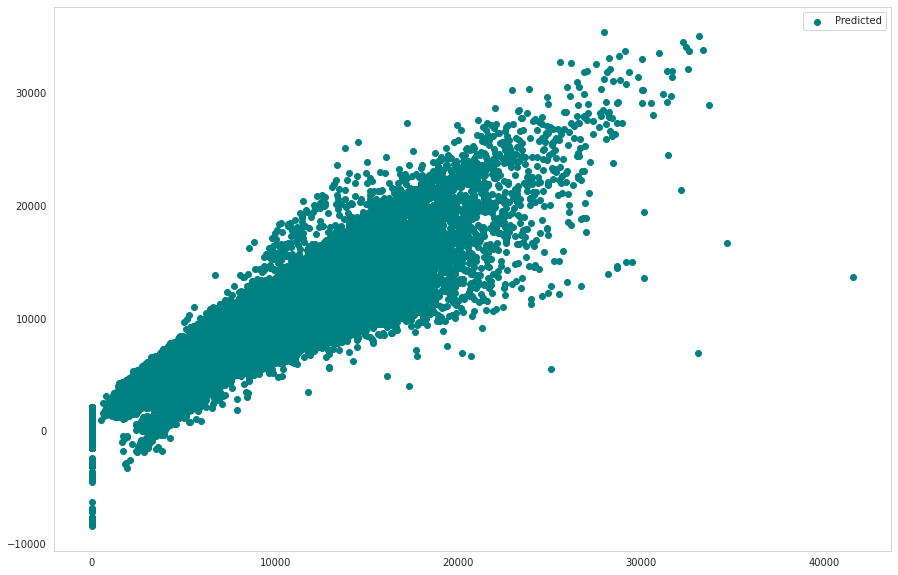

In [130]:
lr = [] #make a empty list
# call the value_cal function to get all the required values of the modal
lr = values_cal(regressor, y_pred_train_LR,y_pred_test_LR)

## <font color = "sky blue">**2. LARS Lasso Regression**

In [131]:
# Fitting LARS Lasso Regression to the Training set
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

In [132]:
#check the score
las.score(X_train, y_train)

0.9026242907885189

In [133]:
#get the X_train and X-test value
y_pred_train_las = las.predict(X_train)
y_pred_test_las = las.predict(X_test)

Train MSE: 1445477.138328537
Test MSE: 1461490.2813505563

Train RMSE: 1202.2799750176898
Test RMSE: 1208.921122882116

Train MAPE: 3.913935940440144e+17
Test MAPE: 3.896165527781138e+17

Train R2: 0.9026242907885189
Test R2: 0.9026242907885189

Train Adjusted R2: 0.902713035243692
Test Adjusted R2: 0.9008849287756394



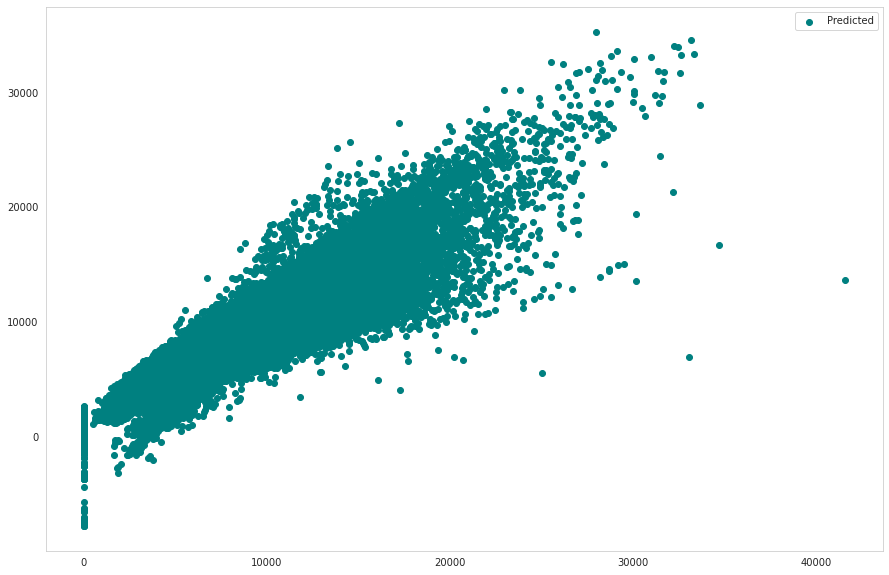

In [134]:
lars = []
# call the value_cal function to get all the required values of the modal
lars = values_cal(las,y_pred_train_las,y_pred_test_las)

## <font color = "sky blue"> **3. Ridge Regression**

In [135]:
# Fitting Ridge Regression to the Training set
ridge= Ridge(alpha=0.01)
ridge.fit(X_train,y_train) #FIT THE MODEL

Ridge(alpha=0.01)

In [136]:
#check the score
ridge.score(X_train, y_train)

0.9027186149271342

In [137]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

Train MSE: 1444076.9597104297
Test MSE: 1460445.858842082

Train RMSE: 1201.6975325390451
Test RMSE: 1208.489080977599

Train MAPE: 3.965331905716957e+17
Test MAPE: 3.94793026559066e+17

Train R2: 0.9027186149271342
Test R2: 0.9027186149271342

Train Adjusted R2: 0.902807368656093
Test Adjusted R2: 0.9009558294846267



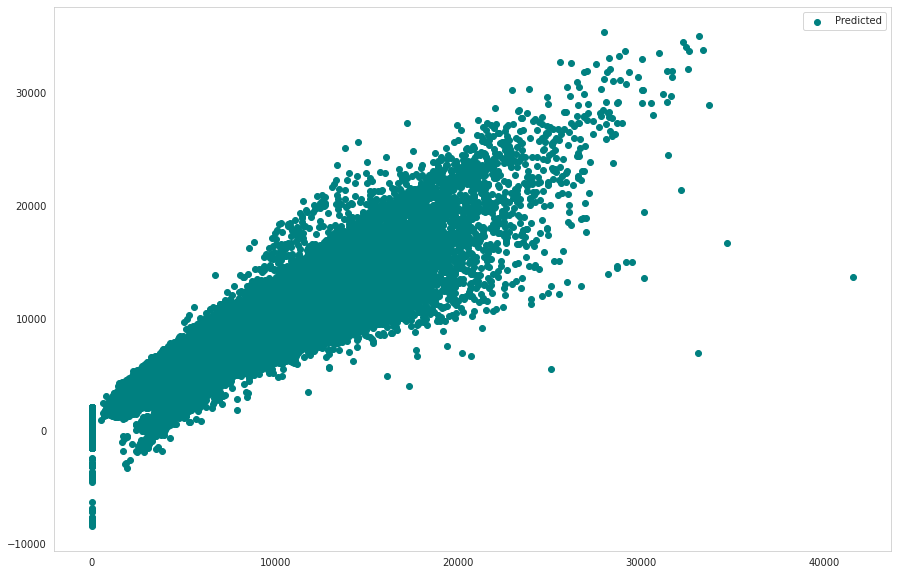

In [138]:
ridgeR = [] #make a empty list
# call the value_cal function to get all the required values of the modal
ridgeR = values_cal(ridge, y_pred_train_ridge,y_pred_test_ridge)

## <font color = "sky blue">**4. K-Nearest Neighbors Regression**

In [140]:
#checking shape of train dataset
X_train.shape[0],y_train.shape[0]

(813767, 813767)

As KNN was taking a very long time for execution we decided it to run on only first 1,00,000 rows 

In [141]:
#creating data with first 1,00,000 rows
X_t = X_train.iloc[0:100000]
y_t = y_train.iloc[0:100000]

In [142]:
# Creating test data with 80:20 ratio
X_te = pd.DataFrame(X_test[0:20000])
y_te = y_test.iloc[0:20000]


In [143]:
# Fitting K-Nearest Neighbors Regression to the Training set
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_t, y_t)

In [144]:
#get the X_train and X-test value
y_pred_train_knn = knnreg.predict(X_t)
y_pred_test_knn = knnreg.predict(X_te)

Train MSE: 4043078.606301022
Test MSE: 4577365.825498334

Train RMSE: 2010.7408103236535
Test RMSE: 2139.4779329309135

Train MAPE: 5.090112714282186e+16
Test MAPE: 4.561678798765004e+16

Train R2: 0.7270977073754882
Test R2: 0.7270977073754882

Train Adjusted R2: 0.7278255693379243
Test Adjusted R2: 0.6975188400407631



<Figure size 1080x720 with 0 Axes>

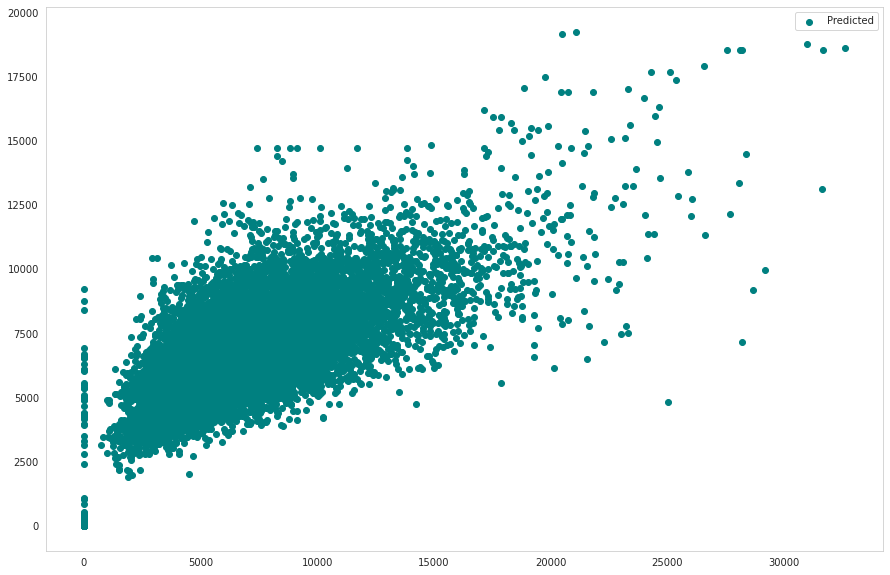

In [145]:
l1 = list()

#calculate MSE
#train
MSE_t= mean_squared_error(y_t, y_pred_train_knn)
print("Train MSE:",MSE_t)
l1.append(MSE_t)

#test
MSE_te= mean_squared_error(y_te, y_pred_test_knn)
print("Test MSE:",MSE_te)
l1.append(MSE_te)

#calculate RMSE
#Train
RMSE_t=np.sqrt(MSE_t)
print("\nTrain RMSE:",RMSE_t)
l1.append(RMSE_t)
      
#test
RMSE_te=np.sqrt(MSE_te)
print("Test RMSE:",RMSE_te)
l1.append(RMSE_te)

#calculate MAPE
#train
MAE_t= mean_absolute_percentage_error(y_t, y_pred_train_knn)
print("\nTrain MAPE:",MAE_t)
l1.append(MAE_t)

#test
MAE_te= mean_absolute_percentage_error(y_te, y_pred_test_knn)
print("Test MAPE:",MAE_te)
l1.append(MAE_te)

#calculate r2 and adjusted r2
#train
r2_t= r2_score(y_t, y_pred_train_knn)
print("\nTrain R2:",r2_t)
l1.append(r2_t)

#test
r2_te= r2_score(y_te, y_pred_test_knn)
print(f"Test R2:",r2_t)
l1.append(r2_te)

rows = X_te.shape[0]
cols = X_te.shape[1]

#train
Adjusted_R2_t = (1 - (1 - r2_t * ((rows - 1) / (rows - cols - 1))))
print(f"\nTrain Adjusted R2:",Adjusted_R2_t)
l1.append(Adjusted_R2_t)

#test
Adjusted_R2_te = (1 - (1 - r2_te * ((rows - 1) / (rows - cols - 1))))
print(f"Test Adjusted R2: {Adjusted_R2_te}\n")
l1.append(Adjusted_R2_te)

#Plot the figure
plt.figure(figsize=(15,10))
plt.scatter(y_te,np.array(y_pred_test_knn), color = "Teal")
# plt.plot(y_test,(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

k_nn = [] #make a empty list
# call the value_cal function to get all the required values of the modal
k_nn = [round(value, 4) for value in l1]

## <font color = "sky blue">**Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

Following are some significant findings from the analysis:

*   The largest sales among the other months are in the month of December.This validates the hypothesis about this feature
*   Due to the fact that stores are often closed on Sundays, which had the lowest sales during the week, there were more sales on Monday. This validates the hypothesis about this feature.
*   Stores that participated in the promotion saw a roughly 100% increase in sales.This validates the hypothesis about this feature.
*   The type of store has a significant impact on how and when stores open. Despite being scarce, store type B had the greatest average sales. The three types of assortments, especially level B, which is exclusively sold at type B stores, and the fact that the stores are open on Sundays are among the reasons. Other than for renovations or other reasons, none of the Type "b" stores ever closed.
*   We can see that the majority of stores are closed on state holidays. However, it's noteworthy to notice that more stores were open during school breaks than during state holidays.
*   The dataset's outliers displayed justified behaviour. The anomalies either belonged to store type B or were running promotions that boosted sales.
